In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

df = pd.read_csv('/kaggle/input/housing-data/housing.csv')

(100, 1)
(100,)
(100, 1)
(100, 2)
[[1.76405235]
 [0.40015721]]


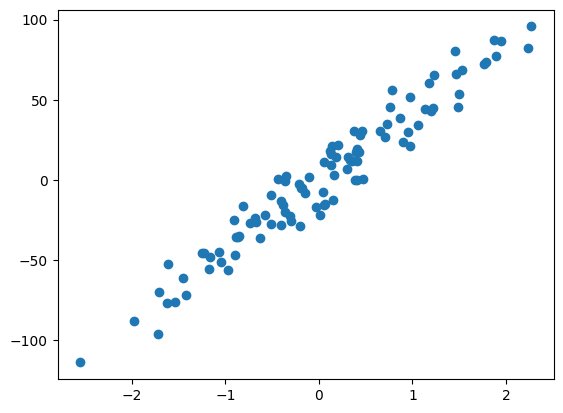

In [2]:
np.random.seed(0)
# Generating random data with a linear trend
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

# Creating matrix X containig the bias column:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

# Parameter vector theta:
np.random.seed(0)
theta = np.random.randn(2, 1)
print(theta)

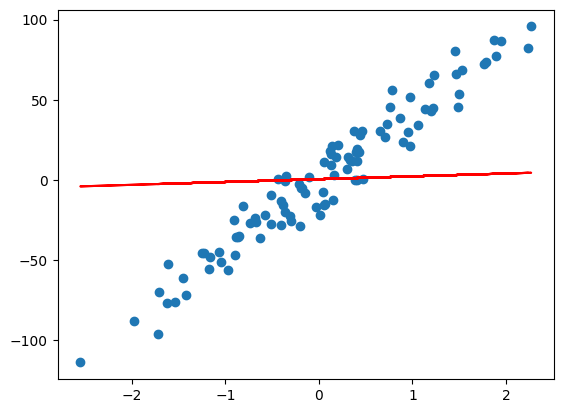

In [3]:
# Rregression Model F = X * theta
def model(X, theta):
    return X.dot(theta)
# Testing:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# the line plot parameters are random so it won't follow the dataset trend

In [4]:
# Evaluate the model's errors:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

print(cost_function(X, y, theta))


905.6306841935502


## **4. Gradient Descent:**

In [5]:
# To update the model parameters and implement gradient descent
# to minimize the cost function.
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history


## **5. Training Phase:**

[[27.90202585]
 [ 0.52634946]]


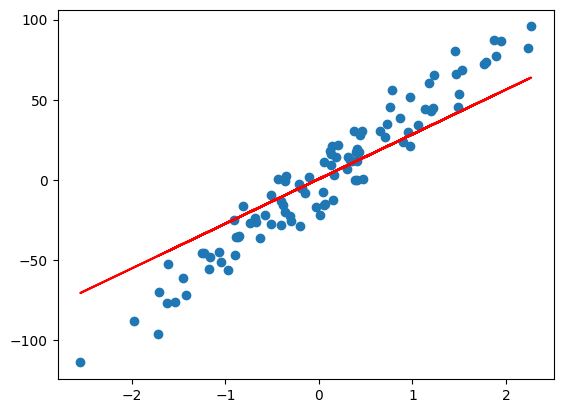

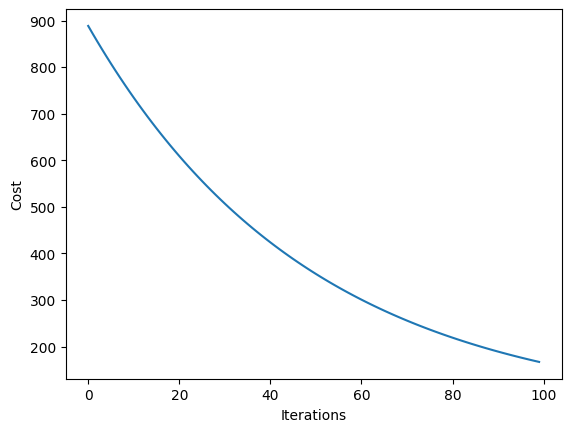

In [6]:
# Define the number of iterations and the learning rate:
n_iterations = 100
learning_rate = 0.01
# Starting training:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_final)

predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()

# Learning Curve (decreasing curve, which gradually stabilizes at
# a minimum value ~ 0 )
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [7]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", as_frame=True)
data = pd.DataFrame(boston.data, columns=boston.feature_names)

data['MEDV'] = boston.target

print(data.head())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['RM']]  
y = data['MEDV'] 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Simple Linear Regression:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

Simple Linear Regression:
MSE: 46.14
R²: 0.37


In [9]:
X = data[["RM","NOX","INDUS","TAX","AGE","CRIM","LSTAT","B"]]  # All features except MEDV
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, y_train)

y_pred = multiple_linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMultiple Linear Regression:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


Multiple Linear Regression:
MSE: 33.92
R²: 0.54


In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression (Degree=2):")
print(f"MSE: {mse_poly:.2f}")
print(f"R²: {r2_poly:.2f}")


Polynomial Regression (Degree=2):
MSE: 26.07
R²: 0.64


### **Ridge Regression:**

In [11]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # Alpha controls the strength of regularization
ridge_reg.fit(X_train_poly, y_train)

y_pred_ridge = ridge_reg.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")


Ridge Regression:
MSE: 17.98
R²: 0.75


### **Lasso Regression:**

In [12]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_poly, y_train)

y_pred_lasso = lasso_reg.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")


Lasso Regression:
MSE: 16.29
R²: 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.587e+03, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


Comparision Table:
<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>MSE</th>
      <th>R²</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Simple Linear</td>
      <td>46.14</td>
      <td>0.37</td>
    </tr>
    <tr>
      <td>Multiple Linear</td>
      <td>33.92</td>
      <td>0.54</td>
    </tr>
    <tr>
      <td>Polynomial (Degree=2)</td>
      <td>26.07</td>
      <td>0.64</td>
    </tr>
    <tr>
      <td>Ridge</td>
      <td>17.98</td>
      <td>0.75</td>
    </tr>
    <tr>
      <td>Lasso</td>
      <td>17.98</td>
      <td>0.75</td>
    </tr>
  </tbody>
</table>
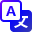

**Discussion**:

1. When to Use Linear Regression?
- we use linear regression when the relationship between features and the target variable is approximately linear.
It is simple, interpretable, and computationally efficient.

2. When to Use Polynomial Regression?
- we use polynomial regression when the relationship between features and the target is non-linear.
NB: Risk of overfitting, especially with higher-degree polynomials.

3. When to Use Regularization (Ridge/Lasso)?
- we use Ridge regression when we want to prevent overfitting by penalizing large coefficients but keeping all features.
- we use Lasso regression when we suspect that only a subset of features is relevant (it performs feature selection by shrinking some coefficients to zero).